### 參數調整

- base_distance_threshold: 基礎距離閾值（像素）
- similarity_threshold: 整體相似性閾值（0-1）
- aspect_ratio_weight: 長寬比相似性權重
- area_ratio_weight: 面積比例權重
- spatial_weight: 空間距離權重
- max_overlap_ratio: 最大重疊比例容忍度
- max_aspect_ratio_diff: 最大長寬比差異容忍度
- max_area_ratio_diff: 最大面積比例差異容忍度

In [ ]:
from merge_block import (
    ClusteringConfig, 
    CattleClusterer, 
    ClusteringVisualizer,
    ClusteringAnalyzer,
    print_stats
)

# 建立自訂配置
config = ClusteringConfig(
    base_distance_threshold=110,      # 較小距離避免誤合併
    similarity_threshold=0.35,        # 高精確度要求
    
    spatial_weight=0.4,             # 降低距離權重
    aspect_ratio_weight=0.4,        # 提高形狀權重
    area_ratio_weight=0.2,       # 提高面積權重
    
    max_overlap_ratio=0.7,          # 嚴格重疊控制
    max_aspect_ratio_diff=0.6,      # 嚴格形狀要求
    max_area_ratio_diff=0.8
)

# 或使用預設配置
config_strict = ClusteringConfig.preset_strict()  # 嚴格模式
config_loose = ClusteringConfig.preset_loose()    # 寬鬆模式
config_balanced = ClusteringConfig.preset_balanced()  # 平衡模式

# 初始化分群器
clusterer = CattleClusterer(config) # config_strict, config_loose, config_balanced

input_file = '../tmp_dataset/for_segment/coco_type/38.json'
output_file = '../tmp_dataset/for_segment/coco_type/merged_annotations.json'

# 執行分群
data, stats = clusterer.cluster_file(
    input_file, 
    output_file
)

In [ ]:
# 詳細品質分析
from merge_block import ClusteringAnalyzer

input_file = '../tmp_dataset/for_segment/coco_type/38.json'
output_file = '../tmp_dataset/for_segment/coco_type/merged_annotations.json'

# 分析分群品質
analyzer = ClusteringAnalyzer()
quality_report = analyzer.analyze_quality(input_file, output_file)

print(f"壓縮比率：{quality_report['compression_ratio']:.3f}")
print(f"總合併數：{quality_report['total_merges']}")
print(f"平均群集大小：{quality_report['avg_cluster_size']:.2f}")
print(f"群集大小分佈：{quality_report['cluster_size_distribution']}")

壓縮比率：0.131
總合併數：2098
平均群集大小：7.64
群集大小分佈：{10: 32, 11: 35, 8: 24, 2: 26, 12: 17, 7: 13, 3: 18, 14: 5, 1: 61, 9: 28, 6: 11, 13: 4, 17: 6, 23: 2, 22: 5, 21: 2, 25: 1, 24: 2, 20: 3, 15: 1, 19: 2, 16: 2, 18: 2, 5: 5, 4: 9}


載入標註檔案: ./tmp_dataset_seg/yolo_data/labels/merged_annotations/9bfe6ea9-000863.txt
發現 2 個標註物件
  物件 1: cow (類別ID: 0)
    多邊形頂點數: 358
    邊界框: (177, 163, 367, 278)
  物件 2: cow (類別ID: 0)
    多邊形頂點數: 5
    邊界框: (288, 229, 294, 231)
結果已儲存至: visual_ann/visual_result/result.png


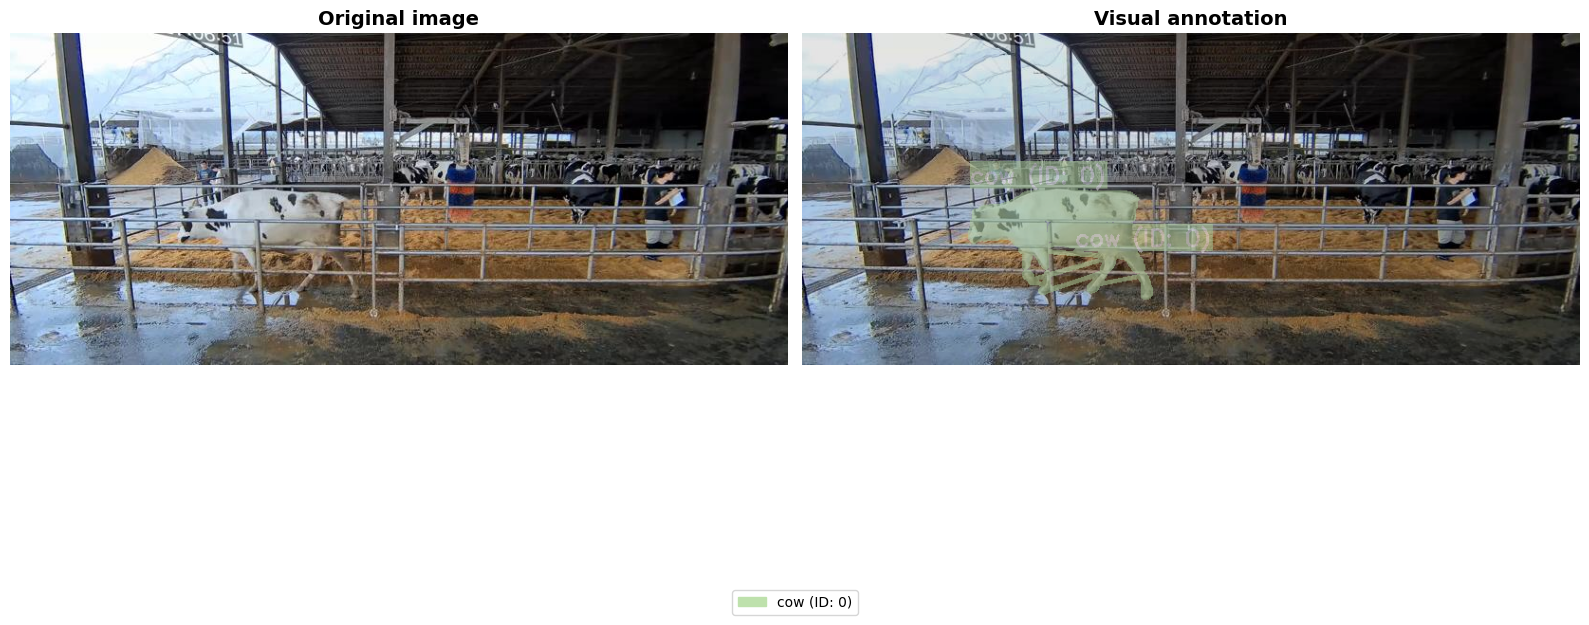

(array([[[237, 251, 252],
         [237, 251, 252],
         [237, 251, 252],
         ...,
         [ 76,  76,  64],
         [ 75,  75,  63],
         [ 74,  74,  62]],
 
        [[236, 250, 251],
         [236, 250, 251],
         [236, 250, 251],
         ...,
         [ 74,  74,  62],
         [ 73,  73,  61],
         [ 72,  72,  60]],
 
        [[238, 250, 250],
         [238, 250, 250],
         [238, 250, 250],
         ...,
         [ 72,  72,  60],
         [ 71,  71,  59],
         [ 71,  71,  59]],
 
        ...,
 
        [[124, 144, 168],
         [118, 139, 160],
         [124, 145, 166],
         ...,
         [ 42,  44,  41],
         [ 47,  49,  46],
         [ 50,  52,  49]],
 
        [[118, 140, 164],
         [111, 133, 156],
         [115, 137, 160],
         ...,
         [ 48,  50,  47],
         [ 54,  56,  53],
         [ 58,  60,  57]],
 
        [[112, 134, 158],
         [ 99, 121, 145],
         [ 95, 117, 140],
         ...,
         [ 47,  49,  46],
  

In [ ]:
from visual_ann.visual_img_ann import visualize_yolo_segmentation_annotations

label_map = {0: "cow"}
image_path = "../tmp_dataset/for_segment/yolo_data_1/images/38/9bfe6ea9-000863.jpg"
annotation_path = "../tmp_dataset/for_segment/yolo_data/labels/merged_annotations/9bfe6ea9-000863.txt"

visualize_yolo_segmentation_annotations(
    image_path=image_path,
    annotation_path=annotation_path,
    label_map=label_map,
    save_path="../visual_ann/visual_result/result.png"  
)

In [ ]:
# 批次處理多個檔案
from pathlib import Path
from merge_block import CattleClusterer, ClusteringConfig

def batch_cluster(input_dir, output_dir, config=None):
    """批次處理資料夾中的所有JSON檔案"""
    if config is None:
        config = ClusteringConfig.preset_balanced()
    
    clusterer = CattleClusterer(config)
    input_path = Path(input_dir)
    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)
    
    all_stats = []
    for json_file in input_path.glob('*.json'):
        output_file = output_path / f"clustered_{json_file.name}"
        _, stats = clusterer.cluster_file(json_file, output_file)
        all_stats.append(stats)
        print(f"✅ 處理完成：{json_file.name}")
    
    return all_stats

# 建立自訂配置
config = ClusteringConfig(
    base_distance_threshold=70,
    similarity_threshold=0.75,
    spatial_weight=0.6,
    aspect_ratio_weight=0.25,
    area_ratio_weight=0.15,
    max_overlap_ratio=0.12
)

# 或使用預設配置
config_strict = ClusteringConfig.preset_strict()  # 嚴格模式
config_loose = ClusteringConfig.preset_loose()    # 寬鬆模式
config_balanced = ClusteringConfig.preset_balanced()  # 平衡模式

# 使用範例
stats_list = batch_cluster(
    input_dir='input_folder/', 
    output_dir='output_folder/', 
    config=config_strict
)